In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#warnings.catch_warnings
from matplotlib import style
from collections import Counter
%matplotlib inline
import os
style.use('fivethirtyeight')

In [ ]:
df  = pd.read_csv('/content/diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
'''v= ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in v:
  df[i] = df[i].fillna(df[i].mean())'''

In [ ]:
#from sklearn.impute import SimpleImputer as SI

'''impute_mean = SI(missing_values=np.nan, strategy='mean')
impute_mean.fit(df)'''

"impute_mean = SI(missing_values=np.nan, strategy='mean')\nimpute_mean.fit(df)"

In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [ ]:
import pandas as pd
import numpy as np

class Scaler:
  def MinMaxScaler(self,datacolumn):
    self.min,self.max=min(datacolumn),max(datacolumn)
    for i in range(len(datacolumn)):
      datacolumn[i] = (datacolumn[i]-self.min)/(self.max-self.min)
    
    return datacolumn
  
  def StandardScaler(self,datacolumn):
    self.var,self.mean = datacolumn.var(),(datacolumn.mean())
    for i in range(len(datacolumn)):
      datacolumn[i] = (datacolumn[i]-self.mean)/np.sqrt((self.var))
    return datacolumn

In [ ]:
# scale = Scaler()
# for i in df.columns.to_list():
#   df[i]=scale.MinMaxScaler(df[i])

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we got skewness lets remove them


In [ ]:
import seaborn as sns
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go throug desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1.set(xlabel='Original ' + col)
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2.set(xlabel='Transformed ' + col)
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2.set(xlabel='NO TRANSFORM ' + col)
                plt.show()
                

    return DF




 ------------------------------------------------------

 'Pregnancies' had 'positive' skewness of 0.90

 Transformation yielded skewness of -0.36


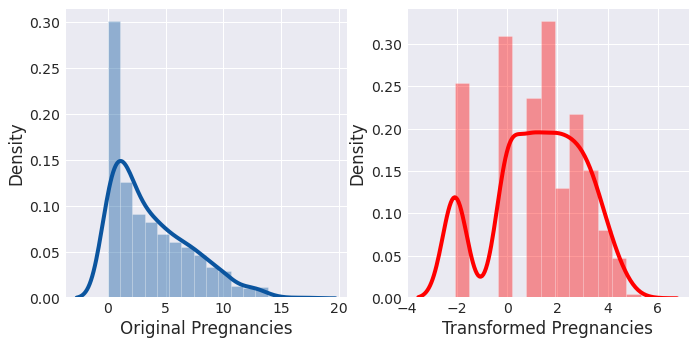


 ------------------------------------------------------

 'Glucose' had 'positive' skewness of 0.53

 Transformation yielded skewness of -0.00


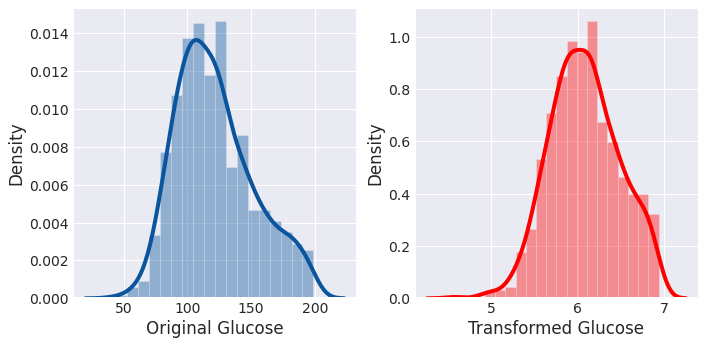


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'BloodPressure' . Skewness = 0.14


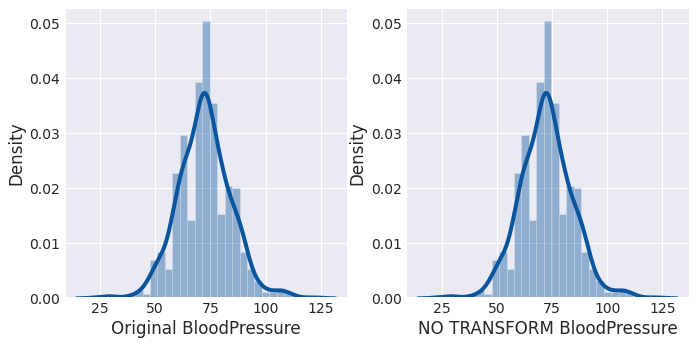


 ------------------------------------------------------

 'SkinThickness' had 'positive' skewness of 0.82

 Transformation yielded skewness of 0.11


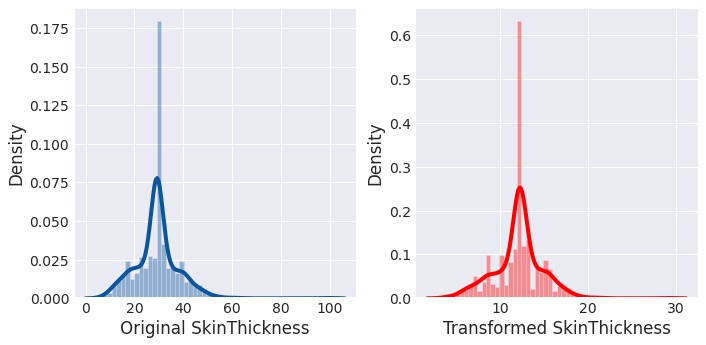


 ------------------------------------------------------

 'Insulin' had 'positive' skewness of 3.02

 Transformation yielded skewness of 0.12


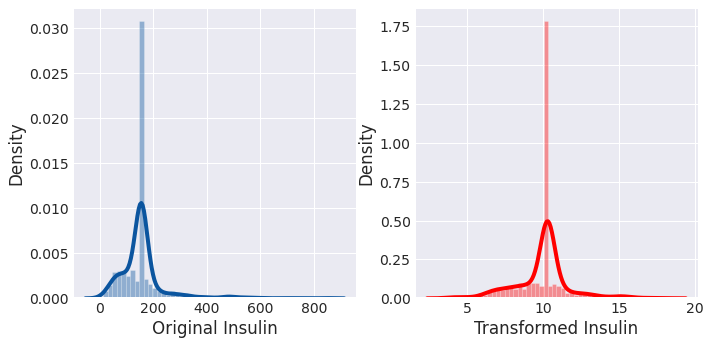


 ------------------------------------------------------

 'BMI' had 'positive' skewness of 0.60

 Transformation yielded skewness of -0.00


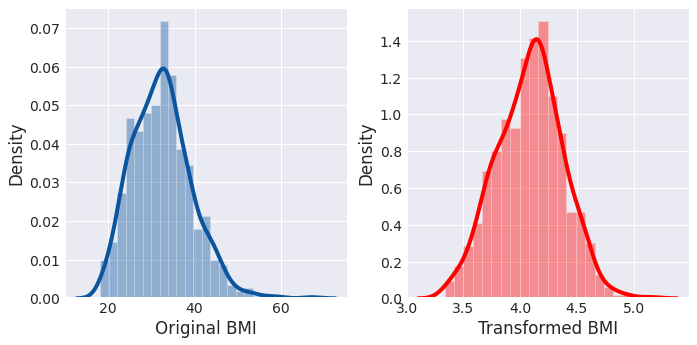


 ------------------------------------------------------

 'DiabetesPedigreeFunction' had 'positive' skewness of 1.92

 Transformation yielded skewness of 0.01


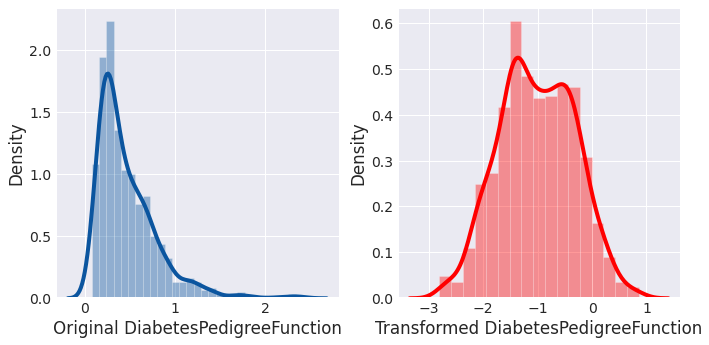

In [ ]:
data=skew_autotransform(df[[
'Pregnancies',
'Glucose',
'BloodPressure',
'SkinThickness',
'Insulin',
'BMI',
'DiabetesPedigreeFunction']].copy(deep=True),exclude=None,plot=True,threshold=0.5,exp=False)
#df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,1.226319,6.081312,72.405184,12.105028,9.984443,4.084981,-1.010662,33.240885,0.348958
std,1.829717,0.397742,12.096346,2.710639,1.766525,0.291206,0.690239,11.760232,0.476951
min,-2.085419,4.578148,24.000000,3.913632,3.769339,3.333029,-2.804441,21.000000,0.000000
25%,0.009970,5.811172,64.000000,10.938523,9.436581,3.884984,-1.487026,24.000000,0.000000
50%,1.389197,6.063171,72.202592,12.250231,10.307281,4.110231,-1.024049,29.000000,0.000000
75%,2.636797,6.354309,80.000000,13.111567,10.307281,4.279920,-0.476104,41.000000,1.000000
max,5.314286,6.931110,122.000000,29.000634,18.016096,5.153076,0.855822,81.000000,1.000000


#Exploratory Analysis

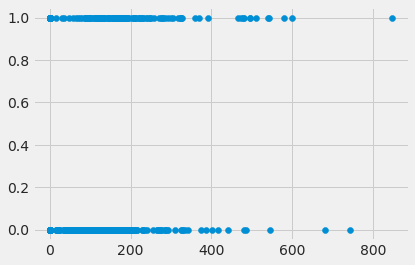

In [ ]:
ax = plt.subplot()
ax.scatter(y=df['Outcome'],x=df['Insulin'])
plt.show()

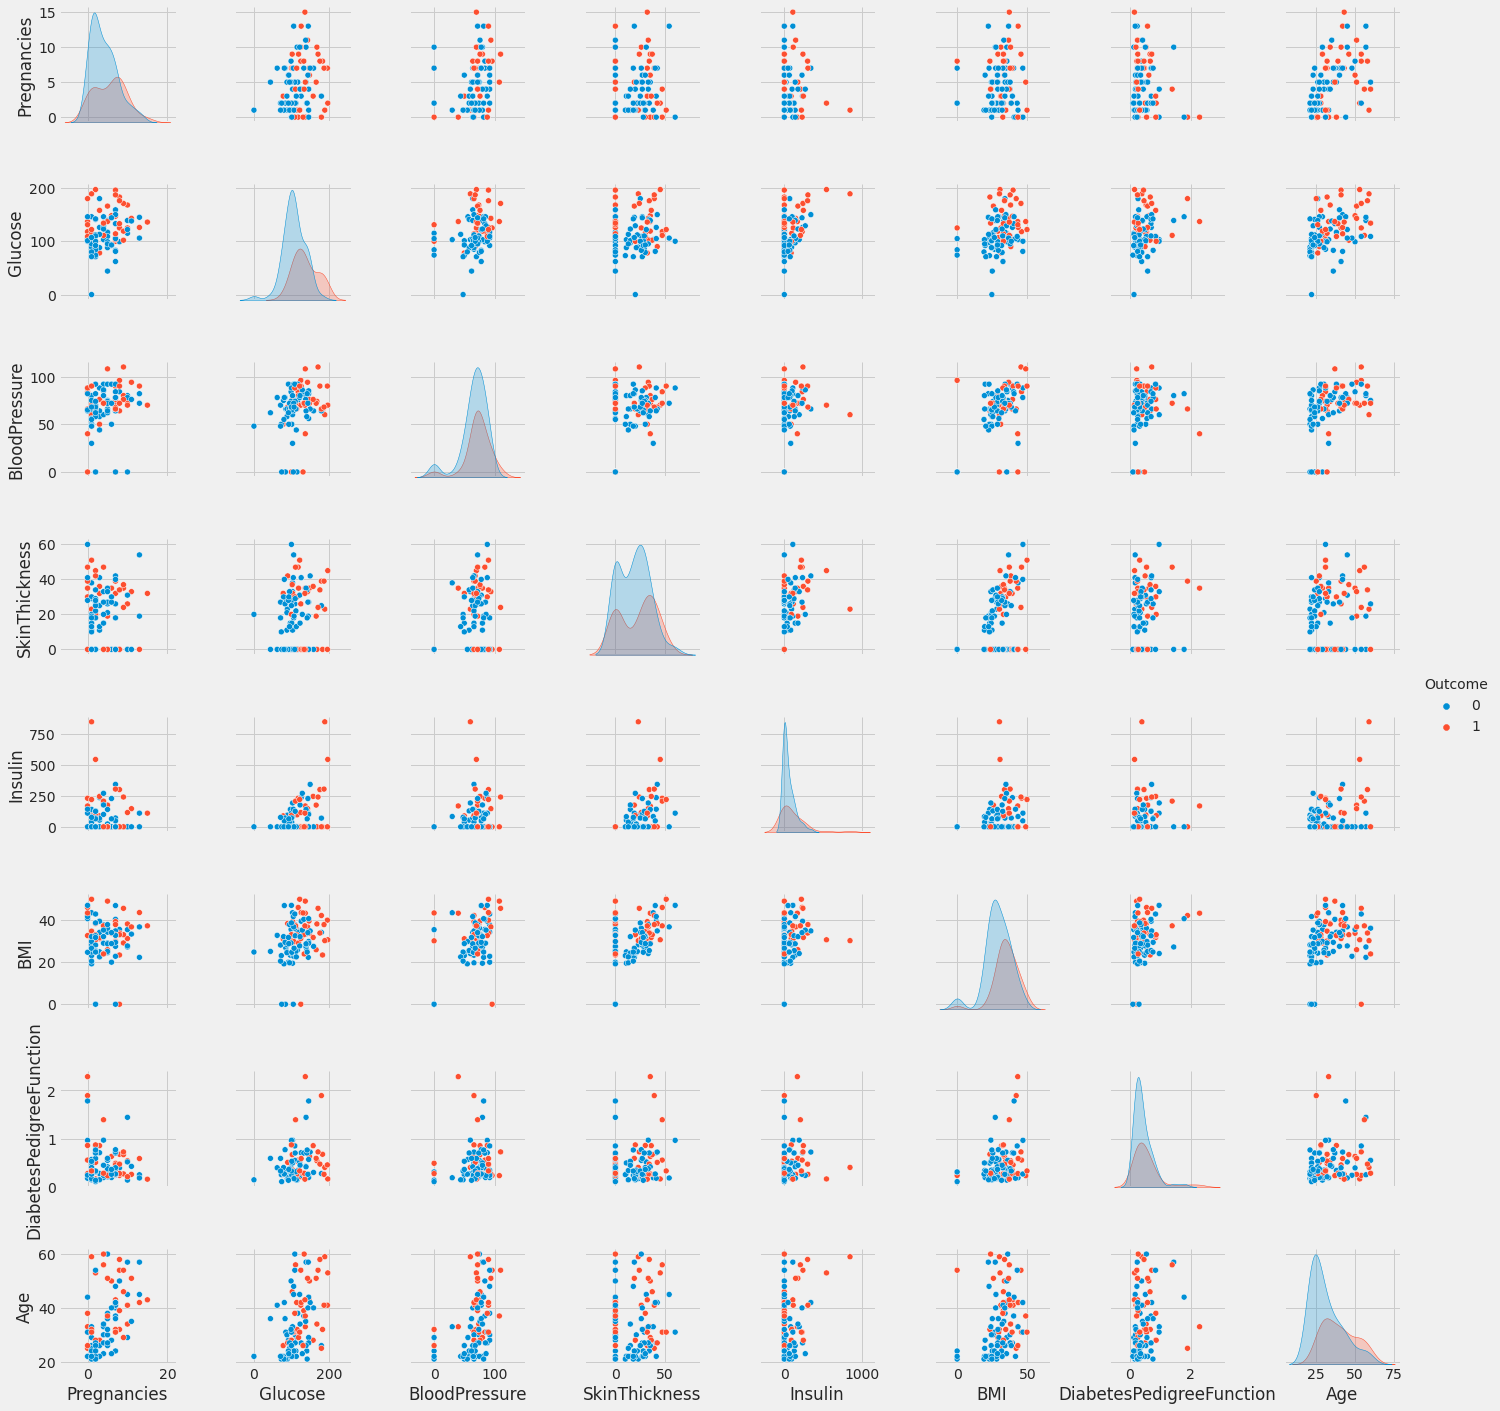

In [ ]:
sns.pairplot(df.head(100),hue='Outcome')
plt.show()

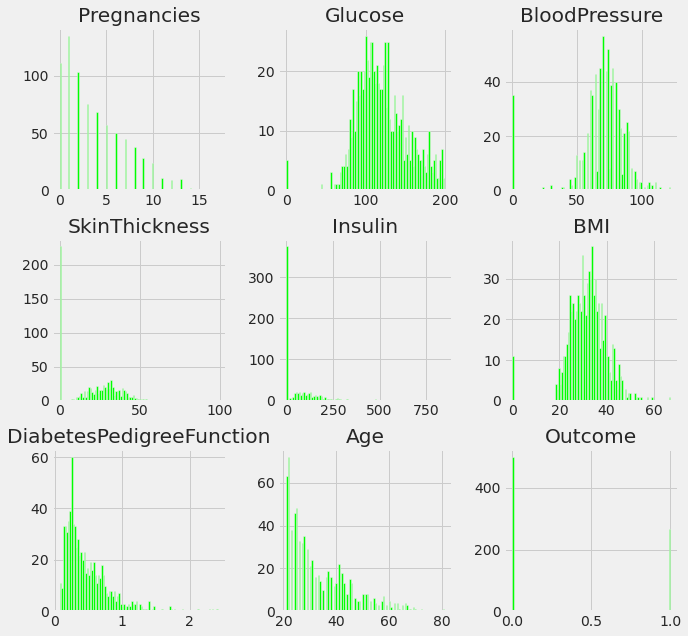

In [ ]:
df.hist(bins=100,figsize=(10,10),color='lime')
plt.show()

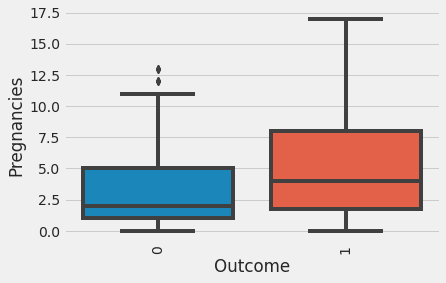

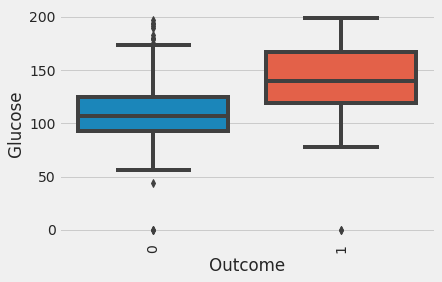

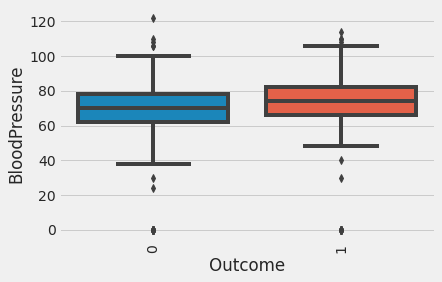

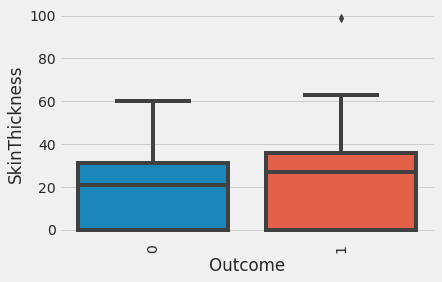

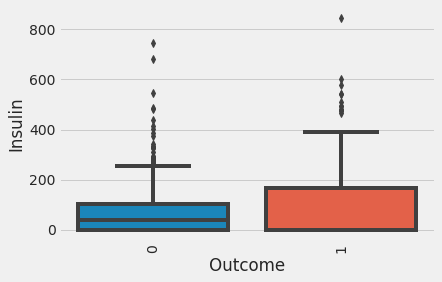

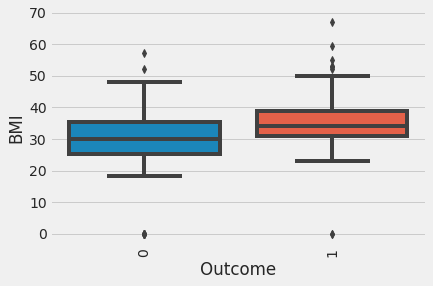

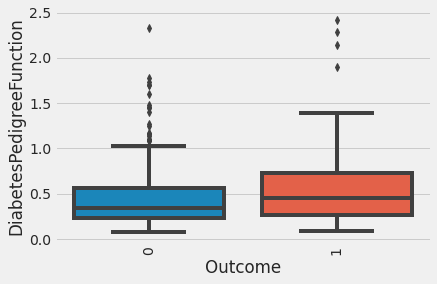

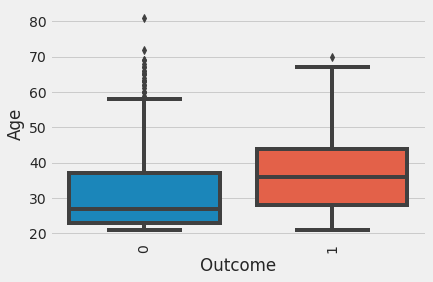

In [ ]:
feature_names = df.columns.to_list()
feature_names.remove('Outcome')
for cols in feature_names :
  sns.boxplot(x=df['Outcome'],y=df[cols])
  plt.xticks(rotation=90)
  plt.xlabel('Outcome')
  plt.ylabel(cols)
  plt.show()

No Outliers By assuming this graph still if u want to check use Inter Quartile Range (1.5 method to find)

#OutLier Treatment 

But if u consider this code we found some outliers which we need to remove or handle it 

In [ ]:
class OutLierTreatment:
  def IQR(self,datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[5,95])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.5*iqr)
    upper_range = Q3 + (1.5*iqr)
    return round(lower_range,3),round(upper_range,3)
  def Treat(self,data):
    l,r = self.IQR(data)
    for i in range(len(data)):
      if data[i] > r:
        data[i] = r
      if  data[i] <l:
        data[i] =l
  
  def check(self,data):
    l,r=self.IQR(data)
    #print(l,r)
    j=0
    for i in data:
      if i<l or i>r:
        j=j+1
      return j



In [ ]:
outlr = OutLierTreatment()

In [ ]:
for i in feature_names:
  l,r = outlr.IQR(df[i])
  print(i,l,r)

In [ ]:
for i in feature_names:
  print(outlr.check(df[i]))


0
0
0
0
0
0
0
0


#TRAIN TEST SPLIT

In [ ]:
def split_test_train(x,y,train_size =0.80,seed=None):
  np.random.seed(seed)
  y=np.array(y)
  data=np.concatenate([x,y.reshape(-1,1)],axis=1)
  np.random.shuffle(data)
  xtrain=data[:int(len(data)*train_size),:-1]
  ytrain=data[:int(len(data)*train_size),-1]
  xtest=data[int(len(data)*train_size):,:-1]
  ytest=data[int(len(data)*train_size):,-1]
  return xtrain,ytrain,xtest,ytest

In [ ]:
x = df.drop(columns='Outcome',inplace=False)
y = df['Outcome']
xtrain,ytrain,xtest,ytest = split_test_train(x,y,train_size=0.80,seed=0)
print('Train data shapes \nx =',xtrain.shape,'y= ',ytrain.shape,'\nTest data shapes\nx =',xtest.shape,'y =',ytest.shape)

Train data shapes 
x = (614, 8) y=  (614,) 
Test data shapes
x = (154, 8) y = (154,)


#KNN From SK-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNS

In [ ]:
test_score ,train_score=[],[]
k_value =[]
for i in range(1,15):
  knn = KNS(i)
  knn.fit(xtrain,ytrain)
  train_score.append(knn.score(xtrain,ytrain)) 
  test_score.append(knn.score(xtest,ytest))
  k_value.append(i)
print('Accuracy=',round(max(test_score)*100,3),'% for K=',k_value[(test_score.index(max(test_score)))])


Accuracy= 77.273 % for K= 12


In [ ]:
neibor = KNS(12)
neibor.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
predicted=neibor.predict(xtest)
predicted

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0.])

In [ ]:
ytest

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0.])

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score

In [ ]:
print(confusion_matrix(predicted,ytest))

[[94 24]
 [11 25]]


In [ ]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.84       105
         1.0       0.69      0.51      0.59        49

    accuracy                           0.77       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
print('Accuracy=',(accuracy_score(predicted,ytest)*100),'%')

Accuracy= 77.27272727272727 %


#KNN FROM SCRATCH

In [ ]:
''' BASICALLY WE USE EUCLIDEAN AND MANHATAN DISTANCE FOR KNN '''
from collections import Counter
class K_Nearest_Neighbor:
    def __init__(self,k=5):
        self.k = k
        
    def Euclidean_distance(self,p1,p2):
        return np.sqrt(np.sum((p1-p2)**2))
    def Manhatan_distance(self,C,W):
        return C+W
        
    #fit training sample and label
    def fit(self,x,y):
        self.xtrain =x
        self.ytrain =y
    #pridict methot
    def predict(self,X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self,x):
        #calculate Euclidean or MAnhatan
        # get k nearest sample 
        # choose most common class label
        distance = [self.Euclidean_distance(x,i) for i in self.xtrain]
        k_index = np.argsort(distance)[:self.k]
        k_nearest_label = [self.ytrain[i] for i in k_index]
        
        most_common = Counter(k_nearest_label).most_common(1)
        return most_common[0][0]




In [ ]:
kn = K_Nearest_Neighbor(k=12)
kn.fit(xtrain,ytrain)

In [ ]:
pred = kn.predict(xtest)
pred

array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0.])

In [ ]:
print('Accuracy=',(accuracy_score(pred,ytest)*100),'%')

Accuracy= 74.02597402597402 %


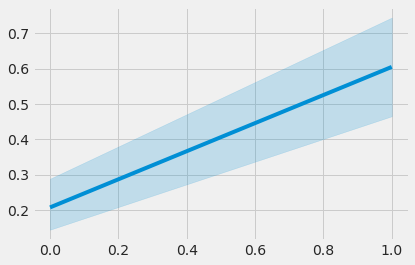

In [ ]:
sns.lineplot(pred,ytest)
plt.show()

#DO PCA FOR PLOTING


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca =PCA(n_components=2)
xt= pca.fit_transform(df.iloc[1:-1,:])

In [ ]:
from plotly import express as ex
p =ex.scatter_matrix(df.head(10),labels = df.columns.to_list(),color= [i for i in range(len(df.columns.to_list())+1)])
p.show()

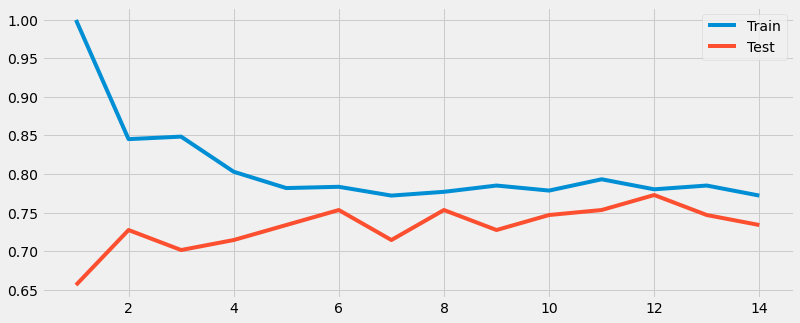

In [ ]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,15),train_score , markers='*',label ='Train')
p =sns.lineplot(range(1,15),test_score, markers='o',label = 'Test')


In [ ]:
print(max(test_score),max(train_score))

0.7727272727272727 1.0


#Random Forest Classifier SK-Learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
rfc = RFC(n_estimators=100, criterion='gini',random_state=None)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predict = rfc.predict(xtest)
predict

array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0.])

In [ ]:
print('Accuracy=',(accuracy_score(predict,ytest)*100),'%')

Accuracy= 75.32467532467533 %


#Random Forest Classifier - SCRATCH 

In [ ]:
#Tmrw BYE BYE GOOD N8